# simSPI Dataset Generation

The goal of this notebook is to:

- Showcase the simulation of target cryoEM datasets of choice
- Utilize the TEM wrapper and associated functions to do so

## Pre-requisites
- Installation of TEM-simulator 1.3  (installation documentation found here: https://tem-simulator.sourceforge.net)
- Installation of ioSPI and simSPI and are on the same level
- Relevant libraries (conda activate recommended, alternatively see requirements.txt)

## TEM-Simulator

TEM-simulator is an open source program designed to simulate and produce transmission electron microscope images for the purpose of testing and evaluating reconstruction methods. These datasets are reproducible using generated metadata. Originally written in C, compSPI wraps it in an easily accessible Python package for usage in tandem with your reconstruction method of choice.

In [1]:
# Only run this cell once upon kernel restart.
import os
root = os.path.dirname(os.path.dirname(os.getcwd()))
os.chdir(root)

In [5]:
# Import packages
import numpy as np
import starfile as sf

from matplotlib import pyplot as plt

# Locally import compSPI packages
from simSPI.simSPI import tem
from ioSPI.ioSPI import particle_metadata

### Inputs
To generate images the user is required to define a pair of `.yaml` files. These files define important fields such as characteristic dataset features or path configurations to save certain output files.

- `path_config.yaml`
    - `pdb_file` : path to the `.pdb` file for the structure the user wishes to generate.
    - `output_dir` : path to output directory where metadata files are outputted.
    - `local_sim_dir` : path to local installation of TEM simulator

- `sim_config.yaml`
    - `molecular_model`
        - `voxel_size_nm` - [nm]
        - `particle_name` - name of the particle
        - `particle_mrcout` - volume map of sample is written

    - `specimen_grid_params`
        - `hole_diameter_nm` - [nm]
        - `hole_thickness_center_nm` - [nm]
        - `hole_thickness_edge_nm` - [nm]

    - `beam_parameters`
        - `voltage_kv:` - [kV]
        - `energy_spread_v` - [V]
        - `electron_dose_e_per_nm2` - [e/nm**2] dose per image
        - `electron_dose_std_e_per_nm2` - standard deviation of dose per image

    - `optics_parameters`
        - `magnification` 
        - `spherical_aberration_mm` - [mm]
        - `chromatic_aberration_mm` - [mm]
        - `aperture_diameter_um` - [um] in back focal plane
        - `focal_length_mm` - [mm]
        - `aperture_angle_mrad` - [mrad] of the condenser lens
        - `defocus_um` - [um]
        - `defocus_syst_error_um` - [um]
        - `defocus_nonsyst_error_um` - [um]
        - `optics_defocusout` - file to write defocus values

    - `detector_parameters`
        - `detector_nx_px` - number of pixels along X axis
        - `detector_ny_px` - number of pixels along Y axis
        - `detector_pixel_size_um` - [um]
        - `average_gain_count_per_electron` - average number of counts per electron
        - `noise` - [bool] whether quantized electron waves result in noise
        - `detector_q_efficiency` - detector quantum efficiency $0 < e < 1$
        - `mtf_params` - `[0,0,1,0,0]` is perfect detector.

    - `miscellaneous`
        - `signal_to_noise` - signal-to-noise-ratio for added white noise $0 < r < 1$

In [6]:
# Define .yaml paths
path_config = 'simSPI/path_config.yaml'
sim_config = 'simSPI/sim_config.yaml'

In [7]:
# Call the TEM simulator through the wrapper and pass in .yamls
simulator = tem.TEMSimulator(path_config, sim_config)

In [8]:
# Run the simulator
particles = simulator.run(export_particles=True)

/Users/jed/opt/anaconda3/envs/simSPI/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/Users/jed/opt/anaconda3/envs/simSPI/lib/python3.8/site-packages/mrcfile/mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x44 0x11 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


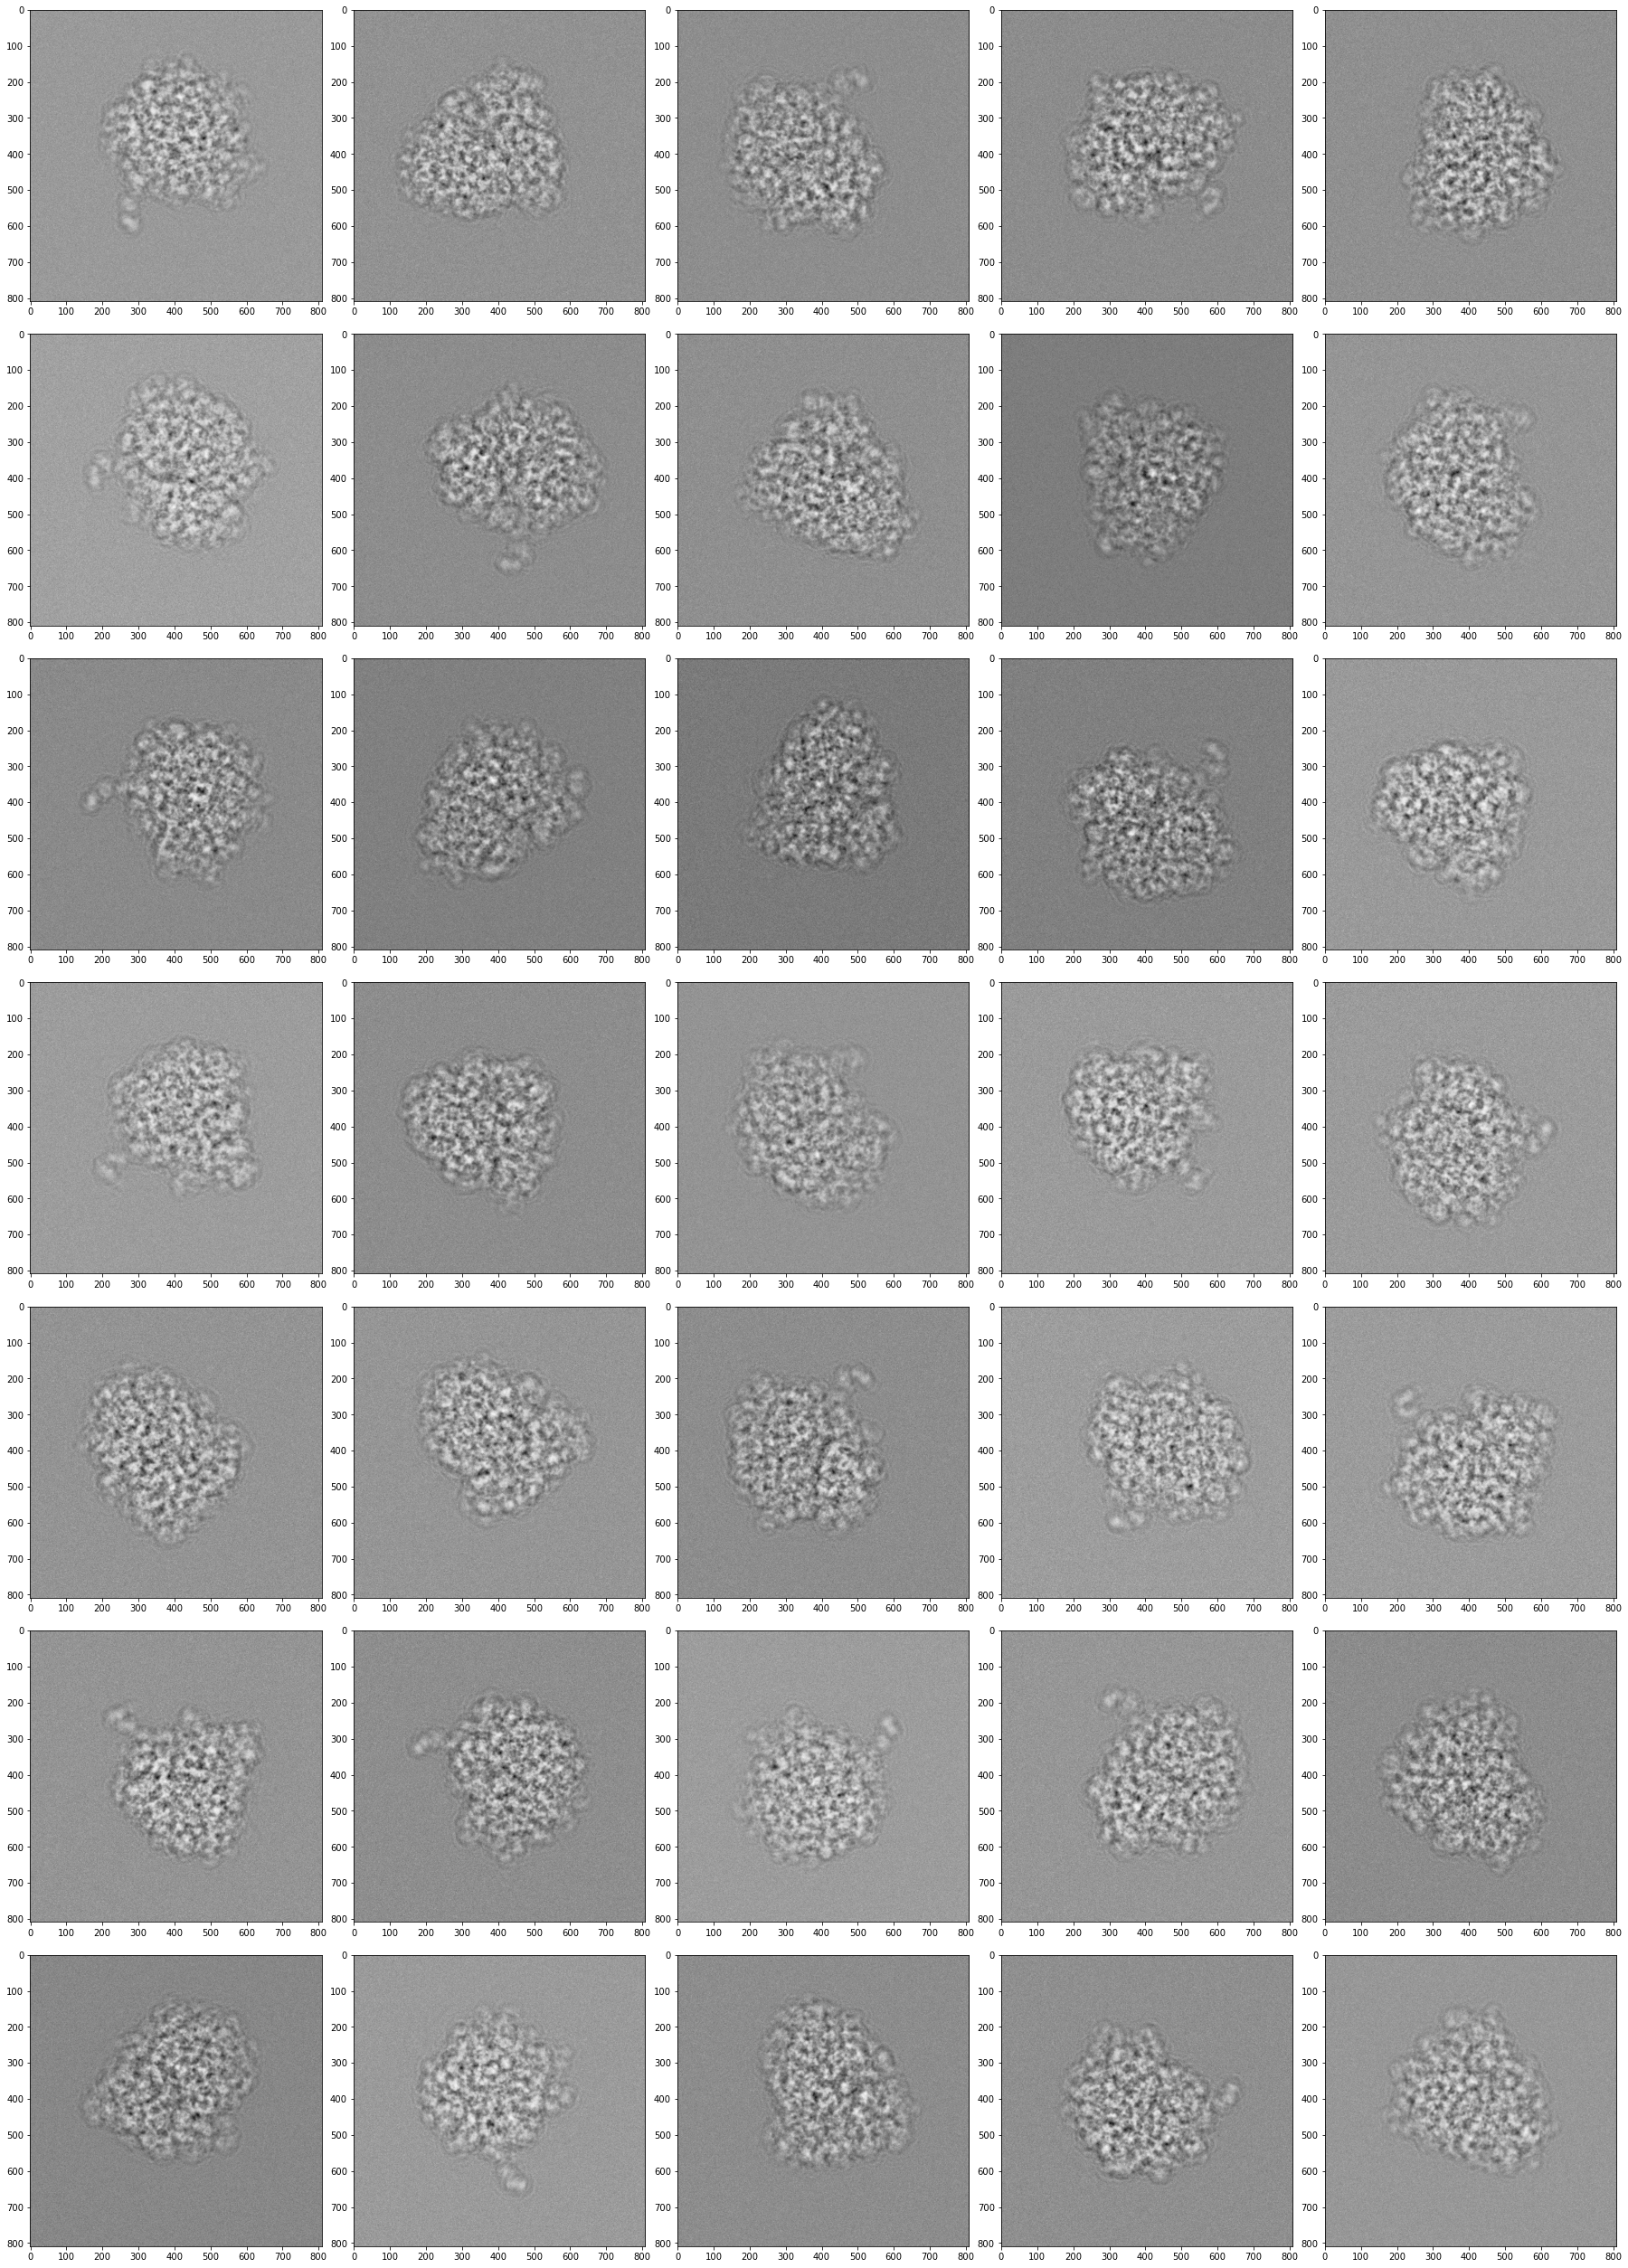

In [9]:
def view_particles(data, slicing=(1,1,1), figsize=1, ncol=5 ):
    """
    """
    view = data[::slicing[0],::slicing[1],::slicing[2]]
    figsize = int(figsize * ncol)
    nrow = np.ceil(view.shape[0] / ncol)
    fig = plt.figure( figsize=(ncol * figsize, nrow * figsize))
        
    for i in np.arange(view.shape[0]):
        fig.add_subplot(int(nrow), int(ncol), i + 1)
        plt.imshow(view[i], cmap='Greys')
        
    plt.tight_layout()
    plt.show()

# Let's visualize the slices!
view_particles(particles)

### Outputs
See o
- `.h5` file : Creation of 2D particle stack from input .pdb structure
- `.star` file : Metadata associated with generated stack for reproduction
    - Specifies detector input parameters as defined by user in configuration `.yaml`'s
    - Generated parameters seeded by user inputs